## Indian Liver Disease Patients: Feature Selection (2/5)
We implement correlation heatmap, mutual information and chi-squared statistical test to select the most imformative attributes.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Import Dataset

In [2]:
df = pd.read_csv('../input/liver-disease-eda-part-1-3/teliko.csv')

In [3]:
label_encoder = LabelEncoder()
#df['Gender'] = label_encoder.fit_transform(df['Gender'])

## Correlation Heatmap

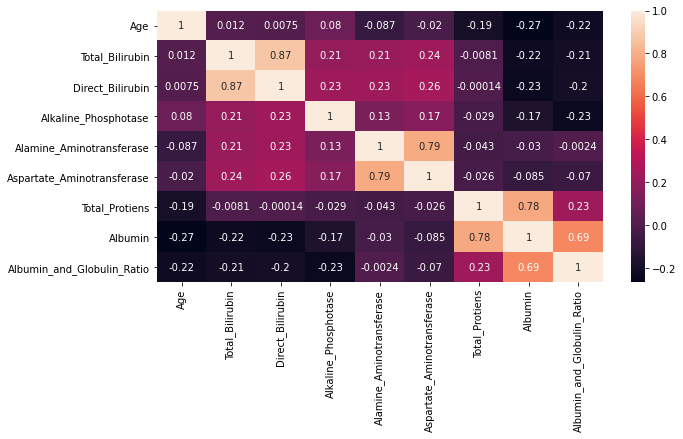

In [4]:
plt.figure(figsize = (10,5))
sns.heatmap(df.drop(columns = ['liver_disease','Gender']).corr(), annot = True)
plt.show()

There is a positive linear correlation between:

* Direct Bilirubin & Total Bilirubin (~ 0.87)
* Total_Protiens & Albumin (~ 0.78)
* Alamine_Aminotransferase& Aspartate_Aminotransferase (~ 0.79)
* Albumin & Albumin and Globulin Ratio (~0.69)


## Feature Selection
### chi-squared statistical test for gender

In [5]:
from sklearn.feature_selection import mutual_info_classif
#from sklearn.feature_selection import chi2, chi2
from scipy.stats import chi2_contingency, chi2

In [6]:
gender = df.Gender.values.reshape(583,1) #gender
y = df.iloc[:,-1].values.reshape(583,1) # target value

In [7]:
cont_table = pd.crosstab([df.Gender], [df.liver_disease])

In [8]:
stat, p, dof, expected = chi2_contingency(cont_table)

In [9]:
# interpret test-statistic
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)


## Mutual Information Gain
for numerical features

In [10]:
from sklearn.feature_selection import mutual_info_classif

In [11]:
features_scores = mutual_info_classif(df.drop(columns = ['Gender', 'liver_disease']), df.iloc[:,-1],random_state=0)
features_names = df.drop(columns = ['Gender','liver_disease']).columns

In [12]:
total_scored_df = pd.DataFrame(data = {'scores':features_scores, 'feature':features_names})

In [13]:
total_scored_df.sort_values(by = 'scores',ascending = False, inplace = True)

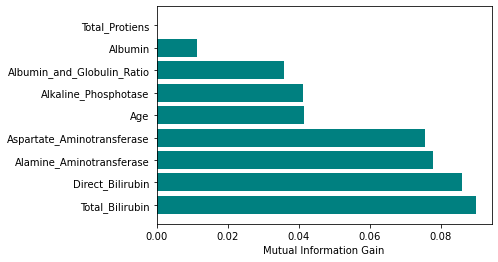

In [14]:
plt.barh(range(len(total_scored_df)), total_scored_df['scores'], color = 'teal')
plt.yticks(ticks = np.arange(0,9), labels = total_scored_df['feature'])
plt.xlabel('Mutual Information Gain')
plt.show()

## Final Features

In [15]:
df1 = df.drop(columns =['Gender', 'Total_Protiens', 'Albumin','Aspartate_Aminotransferase', 'Direct_Bilirubin'])

In [16]:
df1

,Age,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,liver_disease
0,65,0.7,187,16,0.90,1
1,62,10.9,699,64,0.74,1
2,62,7.3,490,60,0.89,1
3,58,1.0,182,14,1.00,1
4,72,3.9,195,27,0.40,1
...,...,...,...,...,...,...
578,60,0.5,500,20,0.37,0
579,40,0.6,98,35,1.10,1
580,52,0.8,245,48,1.00,1
581,31,1.3,184,29,1.00,1


In [17]:
df1.to_csv('liver_reduced_features.csv', index_label = False)